# # importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the file

In [2]:
# reading the data
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
df.head().T

,0,1,2,3,4
Hours,2.5,5.1,3.2,8.5,3.5
Scores,21.0,47.0,27.0,75.0,30.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


on avg student study 5 hr to score 51.48

# Data Visualisation

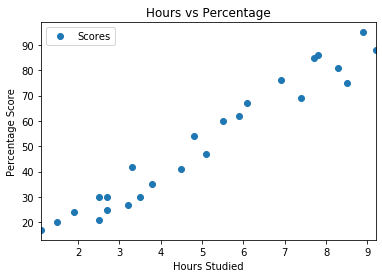

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Traning the model

Splitting the x and y

In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 


LinearRegression()

# Visualising the Test set

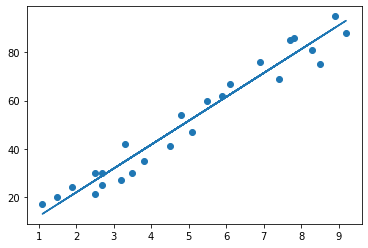

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predictions

Test set prediction

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
y_test

array([20, 27, 69, 30, 62])

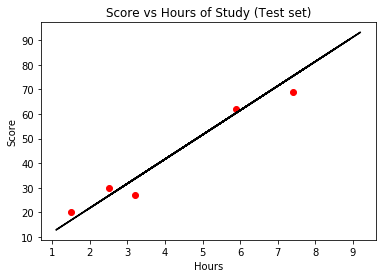

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Score vs Hours of Study (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16.88414476 20.        ]
 [33.73226078 27.        ]
 [75.357018   69.        ]
 [26.79480124 30.        ]
 [60.49103328 62.        ]]


In [23]:
from sklearn.metrics import mean_absolute_error,r2_score
r2_s =r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [24]:
mae

4.183859899002975

In [25]:
r2_s

0.9454906892105356

r2 score the 94% which mean 94% model fit the data

# What will be the predicted score if a student study for 9.25 hrs in a day

In [26]:
predicted_score = regressor.predict([[9.25]])
predicted_score

array([93.69173249])

# The predicated score is 93.69%